# Softmax 사용하기

In [3]:
import keras
from keras.datasets import reuters
keras.__version__

'2.3.1'

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # 1만개 사용 

2113536/2110848 [==============================] - 2s 1us/step


In [24]:
train_data.shape

test_labels.max()

train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [17]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

In [19]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## x값 변환 

In [27]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [29]:
x_test.shape

(2246, 10000)

## y값 변환 

In [30]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## validation data 분할

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## 모델링

In [25]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 학습

In [32]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 136us/step - loss: 2.6839 - accuracy: 0.4975 - val_loss: 1.7586 - val_accuracy: 0.6280
Epoch 2/20
7982/7982 [==============================] - 1s 96us/step - loss: 1.4161 - accuracy: 0.7066 - val_loss: 1.2725 - val_accuracy: 0.7240
Epoch 3/20
7982/7982 [==============================] - 1s 97us/step - loss: 1.0196 - accuracy: 0.7879 - val_loss: 1.0888 - val_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.7938 - accuracy: 0.8295 - val_loss: 1.0012 - val_accuracy: 0.7720
Epoch 5/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.6278 - accuracy: 0.8661 - val_loss: 0.9337 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 97us/step - loss: 0.5050 - accuracy: 0.8939 - val_loss: 0.8736 - val_accuracy: 0.8200
Epoch 7/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.40

## 시각화

In [34]:
import matplotlib.pyplot as plt 

In [36]:
acc = history.history['accuracy']   # train data에 대한 정확도
val_acc = history.history['val_accuracy'] # 검증 데이터에 대한 정확도 

loss = history.history['loss']  # 학습 데이터에 대한 비용 
val_loss = history.history['val_loss']  # 검증 데이터에 대한 비용 

In [38]:
epochs = range(1, len(acc) + 1)
epochs

range(1, 21)

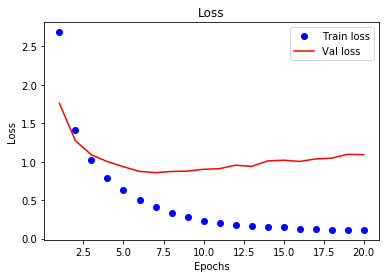

In [41]:
plt.plot(epochs, loss, 'bo', label="Train loss")
plt.plot(epochs, val_loss, 'r', label="Val loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

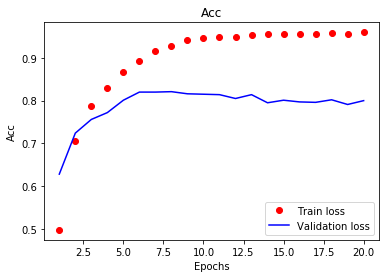

In [42]:
plt.plot(epochs, acc, 'bo', color='red', label= "Train loss")
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title("Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

### 모델 변경(epoch=9)

In [44]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 실제 데이터 적용 
model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 1s 97us/step - loss: 2.3887 - accuracy: 0.5562
Epoch 2/9
8982/8982 [==============================] - 1s 96us/step - loss: 1.3141 - accuracy: 0.7198
Epoch 3/9
8982/8982 [==============================] - 1s 91us/step - loss: 1.0020 - accuracy: 0.7825
Epoch 4/9
8982/8982 [==============================] - 1s 89us/step - loss: 0.7870 - accuracy: 0.8293
Epoch 5/9
8982/8982 [==============================] - 1s 90us/step - loss: 0.6250 - accuracy: 0.8657
Epoch 6/9
8982/8982 [==============================] - 1s 89us/step - loss: 0.5039 - accuracy: 0.8948
Epoch 7/9
8982/8982 [==============================] - 1s 88us/step - loss: 0.4096 - accuracy: 0.9169
Epoch 8/9
8982/8982 [==============================] - 1s 89us/step - loss: 0.3307 - accuracy: 0.9313
Epoch 9/9
8982/8982 [==============================] - 1s 91us/step - loss: 0.2809 - accuracy: 0.9385


In [45]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 128us/step


[0.9531064103568969, 0.7925200462341309]

### Prediction

In [73]:
a = model.predict(x_test[0:3])
a

array([[4.11077126e-05, 3.64091189e-04, 7.82274583e-05, 6.17810071e-01,
        3.39594036e-01, 3.33098869e-05, 4.75574372e-04, 1.09249857e-04,
        1.53898820e-02, 1.47028011e-04, 1.40204822e-04, 1.90300238e-03,
        1.80164134e-04, 2.13723935e-04, 9.79033066e-04, 5.35886735e-04,
        1.67651486e-03, 5.93190081e-04, 7.54720299e-04, 9.96097829e-03,
        3.66005790e-03, 2.91663746e-04, 1.25461374e-05, 5.84397989e-04,
        6.08762675e-05, 2.89925229e-04, 5.34690116e-06, 1.09021610e-04,
        1.35904134e-04, 2.07811405e-04, 1.21014287e-04, 6.54395146e-04,
        8.37343396e-05, 1.10164270e-04, 8.21591879e-04, 4.08638647e-04,
        4.04326478e-04, 2.38892426e-05, 2.07564910e-04, 3.12928925e-04,
        7.24899837e-06, 1.82820062e-04, 1.08364475e-05, 2.94484402e-04,
        7.69052531e-06, 1.13467440e-05],
       [3.68542001e-02, 1.06729835e-01, 4.41174954e-03, 5.78508775e-07,
        6.55985088e-04, 9.22343135e-03, 6.56864047e-03, 4.14970273e-05,
        5.85787056e-05,

In [79]:
from tabulate import tabulate
print(tabulate(a, tablefmt='psql'))

+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| 4.11077e-05 | 0.000364091 | 7.82275e-05 | 0.61781     | 0.339594    | 3.33099e-05 | 0.000475574 | 0.00010925  | 0.0153899   | 0.000147028 | 0.000140205 | 0.001903    | 0.000180164 | 0.000213724 | 0.000979033 | 0.000535887 | 0.00167651  | 0.00059319  | 0.00075472  | 0.00996098 | 0.00366006  | 0.000291664 | 1.25461e-05 | 0.000584398 | 6.08763e-05 | 0.00

In [74]:
import numpy as np 

np.argmax(a, axis=1)

array([ 3, 10,  1], dtype=int64)

In [75]:
b = one_hot_test_labels[0:3]

In [76]:
np.argmax(b, axis=1)

array([ 3, 10,  1], dtype=int64)

In [77]:
np.sum(a, axis=1)

array([1.0000002, 1.       , 1.0000002], dtype=float32)